count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


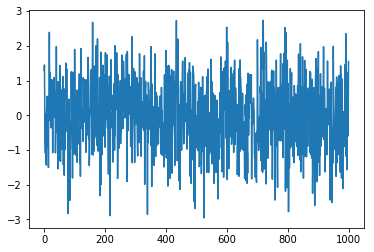

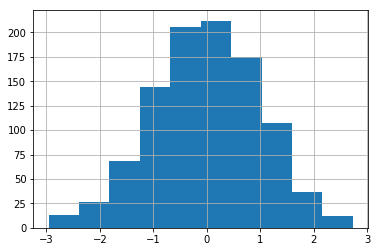

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


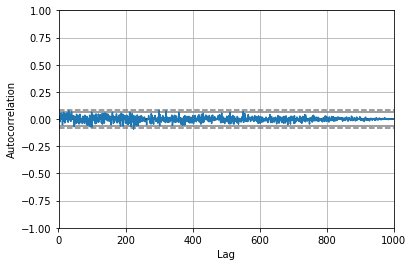

In [3]:
#雜訊編寫
from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
# summary stats
print(series.describe())
# line plot
series.plot()
pyplot.show()
# histogram plot
series.hist()
pyplot.show()
# autocorrelation
autocorrelation_plot(series)
pyplot.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


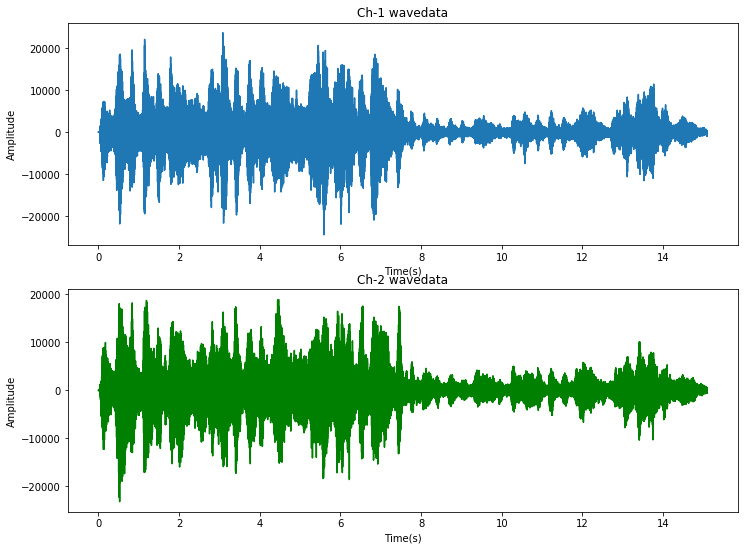

665584


In [2]:
#初始音檔波形圖
import wave
import pylab as pl
import numpy as np

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#繪製波形
pl.figure(figsize=(12, 9))
pl.subplot(211) 
pl.plot(time, wave_data[0])
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-1 wavedata")
pl.subplot(212) 
pl.plot(time, wave_data[1], c="g")
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-2 wavedata")
pl.show()
print len(wave_data[0])

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


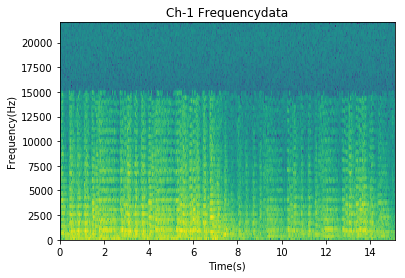

In [5]:
#初始音檔CH1頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)
# plot the wave
plt.specgram(wave_data[0],Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-1 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


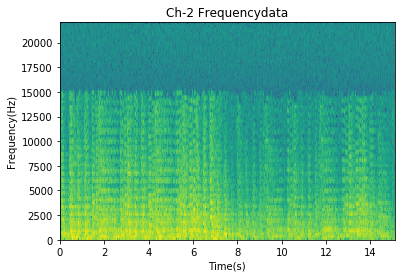

In [4]:
#初始音檔CH2頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)
# plot the wave
plt.specgram(wave_data[1],Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-2 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


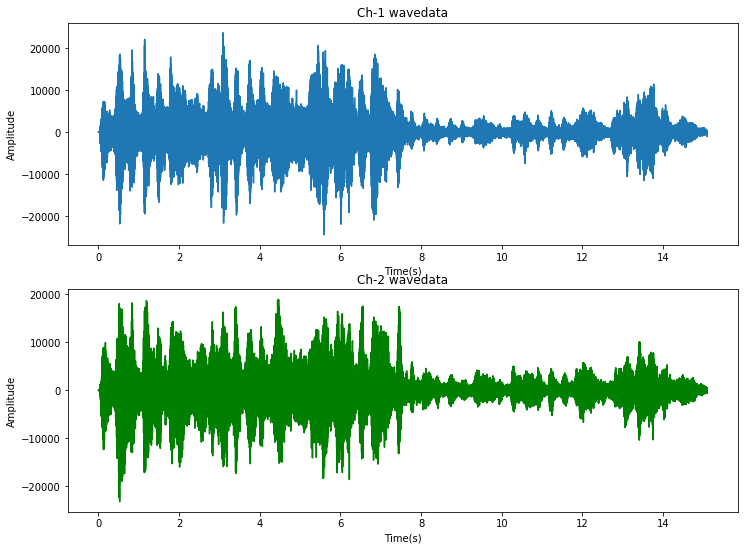

In [6]:
#初始音檔+1倍雜訊波形圖
import wave
import pylab as pl
import numpy as np

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + series[x]
    second[x] = second[x] + series[x]

#繪製波形
pl.figure(figsize=(12, 9))
pl.subplot(211) 
pl.plot(time, first)
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-1 wavedata")
pl.subplot(212) 
pl.plot(time, second, c="g")
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-2 wavedata")
pl.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


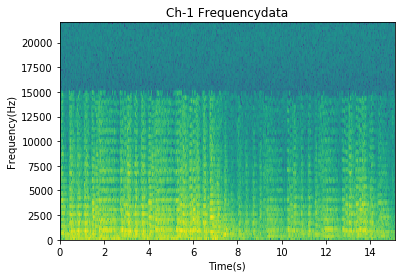

In [7]:
#初始音檔CH1+1倍雜訊頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + series[x]
    second[x] = second[x] + series[x]

# plot the wave
plt.specgram(first,Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-1 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


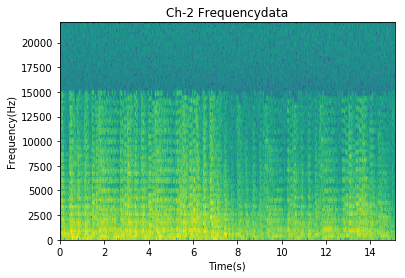

In [8]:
#初始音檔CH2+1倍雜訊頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + series[x]
    second[x] = second[x] + series[x]

# plot the wave
plt.specgram(second,Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-2 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


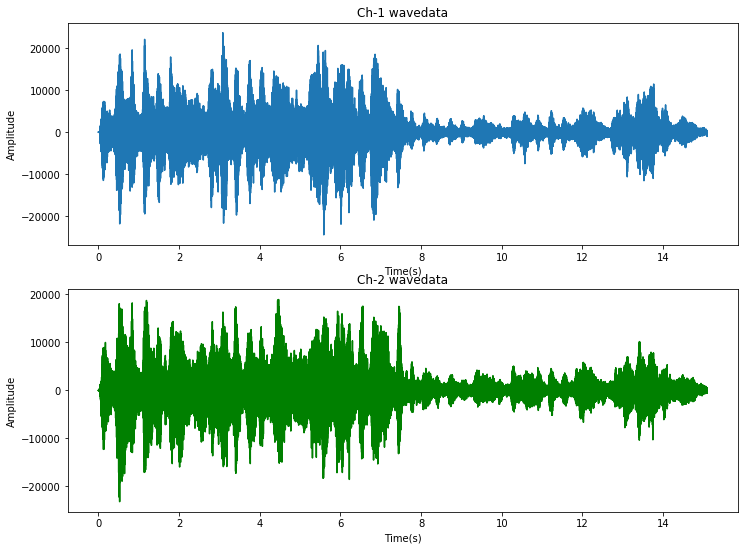

In [9]:
#初始音檔+10倍雜訊波形圖
import wave
import pylab as pl
import numpy as np

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 10*series[x]
    second[x] = second[x] + 10*series[x]

#繪製波形
pl.figure(figsize=(12, 9))
pl.subplot(211) 
pl.plot(time, first)
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-1 wavedata")
pl.subplot(212) 
pl.plot(time, second, c="g")
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-2 wavedata")
pl.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


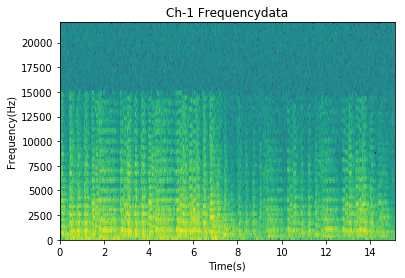

In [10]:
#初始音檔CH1+10倍雜訊頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 10*series[x]
    second[x] = second[x] + 10*series[x]

# plot the wave
plt.specgram(first,Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-1 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


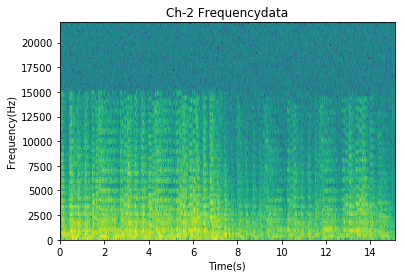

In [11]:
#初始音檔CH2+10倍雜訊頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 10*series[x]
    second[x] = second[x] + 10*series[x]

# plot the wave
plt.specgram(second,Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-2 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


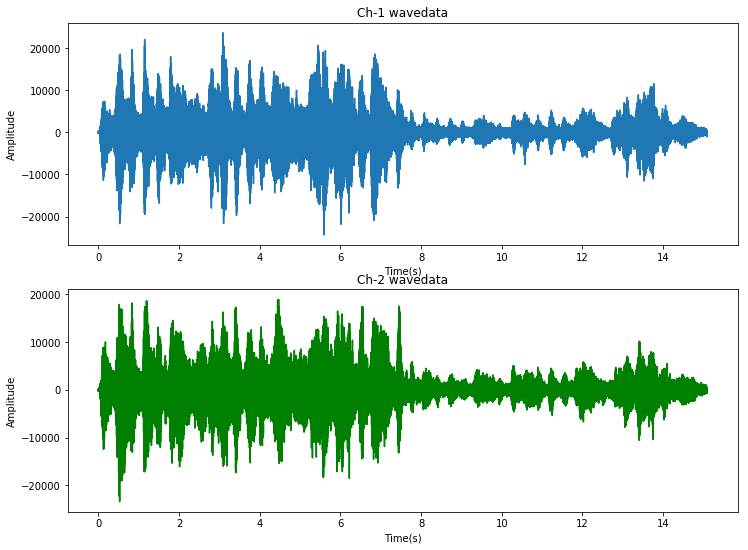

In [12]:
#初始音檔+100倍雜訊波形圖
import wave
import pylab as pl
import numpy as np

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 100*series[x]
    second[x] = second[x] + 100*series[x]

#繪製波形
pl.figure(figsize=(12, 9))
pl.subplot(211) 
pl.plot(time, first)
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-1 wavedata")
pl.subplot(212) 
pl.plot(time, second, c="g")
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-2 wavedata")
pl.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


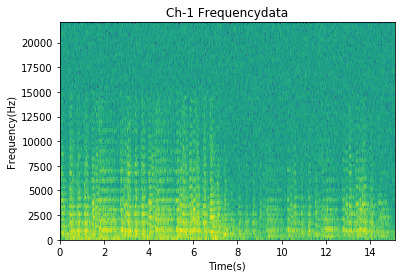

In [14]:
#初始音檔CH1+100倍雜訊頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 100*series[x]
    second[x] = second[x] + 100*series[x]

# plot the wave
plt.specgram(first,Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-1 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


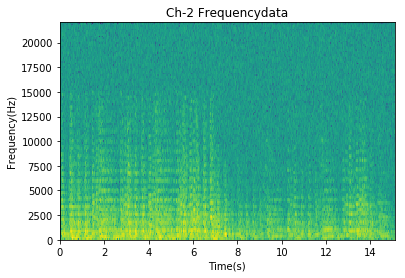

In [16]:
#初始音檔CH2+100倍雜訊頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 100*series[x]
    second[x] = second[x] + 100*series[x]

# plot the wave
plt.specgram(second,Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-2 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


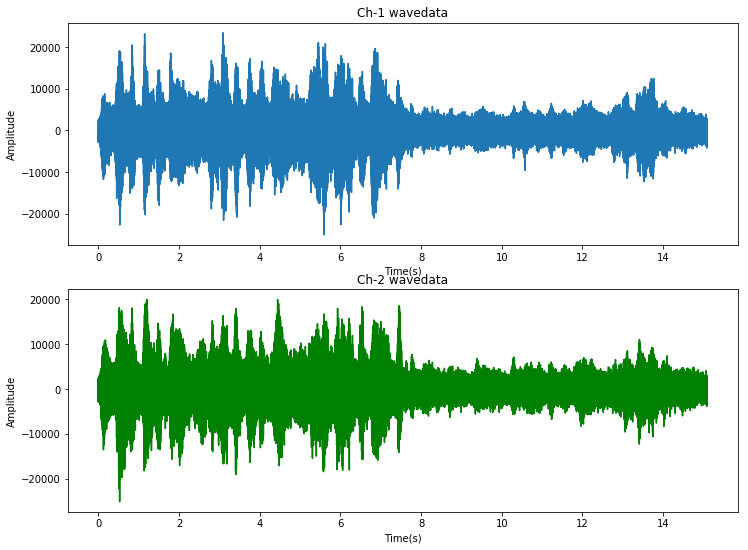

In [13]:
#初始音檔+1000倍雜訊波形圖
import wave
import pylab as pl
import numpy as np

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 1000*series[x]
    second[x] = second[x] + 1000*series[x]

#繪製波形
pl.figure(figsize=(12, 9))
pl.subplot(211) 
pl.plot(time, first)
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-1 wavedata")
pl.subplot(212) 
pl.plot(time, second, c="g")
pl.xlabel("Time(s)")
pl.ylabel("Amplitude")
pl.title("Ch-2 wavedata")
pl.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


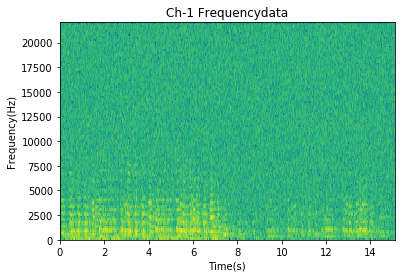

In [15]:
#初始音檔CH1+1000倍雜訊頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 1000*series[x]
    second[x] = second[x] + 1000*series[x]

# plot the wave
plt.specgram(first,Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-1 Frequencydata")
plt.show()

C:\Users\acer\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


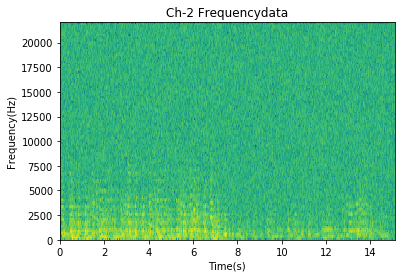

In [17]:
#初始音檔CH2+1000倍雜訊頻譜圖
import wave
import matplotlib.pyplot as plt
import numpy as np
import os

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot

# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(665584)]
series = Series(series)

#打開WAV檔
f = wave.open(r"c:\Users\acer\Desktop\python\music\try.wav","rb")

#讀取格式信息
#(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

#存取波形數據
str_data = f.readframes(nframes)
f.close()

#將波形數據轉換為數組
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
time = np.arange(0, nframes) * (1.0 / framerate)

#加入雜訊
first = wave_data[0]
second = wave_data[1]

for x in range(665584):
    first[x] = first[x] + 1000*series[x]
    second[x] = second[x] + 1000*series[x]

# plot the wave
plt.specgram(second,Fs = framerate, scale_by_freq = True, sides = 'default')
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.title("Ch-2 Frequencydata")
plt.show()